# Importação das bibliotecas e upload do dataset

## Blibliotecas


In [ ]:
import tensorflow.keras as keras
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [116]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, RepeatedStratifiedKFold 
from sklearn.metrics import accuracy_score, classification_report, precision_score, \
confusion_matrix, plot_confusion_matrix, multilabel_confusion_matrix,recall_score,f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, auc,roc_auc_score

from sklearn.preprocessing import label_binarize, StandardScaler, OneHotEncoder
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import plotly
plotly.io.renderers.default = 'colab'
import plotly.graph_objects as go
import plotly.express as px

## Datasets


### Datasets train

In [126]:
columns = ['Feed concentration','Feed flowrate','Feed temperature','Reactor level','Product A concentration',\
        'Product B concentration','Reactor temperature','Coolant flowrate','Product flowrate','Coolant inlet temperature',\
        'Coolant inlet pressure','Level controller output','Coolant controller output','Coolant setpoint','status']

#Importação do arquivo de Train
df_train =  pd.read_csv('https://raw.githubusercontent.com/ArturGuilherme/tcc-avaliacao-classificadores/master/data/baseCompleta.csv',names=columns,sep=';',decimal='.')

#balanceamento da classe de status 0
df_status_0 = df_train[df_train['status']==0].sample(n=1010,random_state=42)
df_status_dif_0 = df_train[df_train['status']!=0]

df_train = pd.concat([df_status_0,df_status_dif_0],ignore_index=True)


#Teste da im portação
df_train.head()

,Feed concentration,Feed flowrate,Feed temperature,Reactor level,Product A concentration,Product B concentration,Reactor temperature,Coolant flowrate,Product flowrate,Coolant inlet temperature,Coolant inlet pressure,Level controller output,Coolant controller output,Coolant setpoint,status
0,19.990,0.24899,30.089,2.0032,2.8291,17.002,79.952,0.77088,0.25153,20.224,56612,25.353,40.552,0.89661,0
1,20.071,0.24607,30.276,2.0142,2.8639,17.345,80.096,0.85524,0.24889,19.982,56263,25.528,40.671,0.88775,0
2,19.809,0.25262,29.907,1.9856,2.8529,17.218,80.104,0.93716,0.25400,20.016,56491,24.772,40.776,0.90914,0
3,20.085,0.24911,29.880,2.0009,2.8646,17.190,79.992,0.93753,0.25241,19.951,56271,25.570,40.422,0.89798,0
4,19.640,0.25136,30.263,1.9778,2.8352,17.149,80.166,0.86200,0.24871,19.916,56504,25.431,40.514,0.89627,0


### Datasets test

In [ ]:
#Importação do arquivo de test
df_test_17 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TCC/datasets/CSTR/operacao_normal_falha17_test.csv',sep=';',decimal='.')
df_test_17.data = pd.to_datetime(df_test_17['data'],format="%d/%m/%Y %H:%M")
print(df_test_17['data'].min())
print(df_test_17['data'].max())
#Teste da importação
df_test_17.reset_index(inplace=True,drop=True)
df_test_17.head()

In [ ]:
#Importação do arquivo de test
df_test_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TCC/datasets/CSTR/operacao_normal_falha2_test.csv',sep=';',decimal='.')
df_test_2.data = pd.to_datetime(df_test_2['data'],format="%d/%m/%Y %H:%M")
print(df_test_2['data'].min())
print(df_test_2['data'].max())
#Teste da importação
df_test_2.reset_index(inplace=True,drop=True)
df_test_2.head()

2021-02-10 00:00:00
2021-02-12 02:00:00


,Concentração de entrada,Vazão de entrada,Temperatura de entrada,Nível do Reator,Concentração de Produto A,Concentração de Produto B,Temperatura do Reator,Vazão de Refrigerante,Vazão de Produto,Temperatura Refrigerante,Pressão Refrigerante,Sinal de Controle Nível,Sinal de Controle de Vazão,Setpoint Controle Vazão,Falha,data
0,19.771,0.24721,29.930,2.0116,2.8608,17.501,79.779,0.999325,0.25066,19.832,56033,25.306,40.706,0.90008,1,2021-02-10 00:00:00
1,19.866,0.25057,30.052,1.9917,2.8451,16.846,79.995,0.808916,0.24651,19.780,56256,26.331,40.731,0.89727,1,2021-02-10 00:10:00
2,19.995,0.25329,30.110,2.0000,2.8586,17.137,80.070,0.946417,0.25162,19.777,55852,25.131,40.345,0.90646,1,2021-02-10 00:20:00
3,20.029,0.25328,30.072,1.9919,2.8563,17.038,79.732,0.908921,0.25155,19.832,56183,25.715,40.588,0.90638,1,2021-02-10 00:30:00
4,20.096,0.25287,30.468,2.0109,2.8636,17.150,80.062,0.847152,0.24932,19.897,56620,25.855,40.717,0.89430,1,2021-02-10 00:40:00


In [ ]:
#Importação do arquivo de test
df_test_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TCC/datasets/CSTR/operacao_normal_falha3_test.csv',sep=';',decimal='.')
df_test_3.data = pd.to_datetime(df_test_3['data'],format="%d/%m/%Y %H:%M")
print(df_test_3['data'].min())
print(df_test_3['data'].max())
#Teste da importação
df_test_3.reset_index(inplace=True,drop=True)
df_test_3.head()

2021-03-02 17:30:00
2021-03-04 19:30:00


,Concentração de entrada,Vazão de entrada,Temperatura de entrada,Nível do Reator,Concentração de Produto A,Concentração de Produto B,Temperatura do Reator,Vazão de Refrigerante,Vazão de Produto,Temperatura Refrigerante,Pressão Refrigerante,Sinal de Controle Nível,Sinal de Controle de Vazão,Setpoint Controle Vazão,Falha,data
0,19.782,0.24926,29.992,1.9860,2.8603,17.135,79.933,0.932300,0.25158,19.767,56935,25.297,40.703,0.90003,1,2021-03-02 17:30:00
1,19.996,0.25256,30.331,2.0006,2.8502,17.207,79.892,0.859036,0.25023,19.819,56634,24.675,40.711,0.89579,1,2021-03-02 17:40:00
2,19.920,0.24681,29.643,2.0145,2.8510,16.958,80.052,0.888704,0.24446,19.780,56826,25.565,40.730,0.90966,1,2021-03-02 17:50:00
3,19.889,0.24999,29.885,2.0245,2.8670,17.137,80.211,0.848486,0.25031,19.904,55959,24.638,40.562,0.90211,1,2021-03-02 18:00:00
4,19.928,0.25103,30.137,1.9909,2.8863,17.053,80.085,0.897887,0.24754,20.080,57085,24.851,40.731,0.90250,1,2021-03-02 18:10:00


In [ ]:
#Importação do arquivo de test
df_test_13 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TCC/datasets/CSTR/operacao_normal_falha13_test.csv',sep=';',decimal='.')
df_test_13.data = pd.to_datetime(df_test_13['data'],format="%d/%m/%Y %H:%M")
print(df_test_13['data'].min())
print(df_test_13['data'].max())
#Teste da importação
df_test_13.reset_index(inplace=True,drop=True)
df_test_13.head()

2021-03-20 00:10:00
2021-03-22 02:10:00


,Concentração de entrada,Vazão de entrada,Temperatura de entrada,Nível do Reator,Concentração de Produto A,Concentração de Produto B,Temperatura do Reator,Vazão de Refrigerante,Vazão de Produto,Temperatura Refrigerante,Pressão Refrigerante,Sinal de Controle Nível,Sinal de Controle de Vazão,Setpoint Controle Vazão,Falha,data
0,19.787,0.25193,29.778,1.9988,2.7994,17.215,79.797,0.925401,0.25288,20.260,56828,25.294,40.695,0.89999,1,2021-03-20 00:10:00
1,20.065,0.25088,30.004,2.0021,2.8551,17.217,80.129,0.898546,0.25170,19.979,56275,24.973,40.721,0.89001,1,2021-03-20 00:20:00
2,20.102,0.25096,29.899,2.0099,2.8497,17.287,80.072,0.851110,0.24835,19.882,56075,25.035,40.742,0.90505,1,2021-03-20 00:30:00
3,19.899,0.25175,29.703,2.0023,2.8336,17.221,80.036,0.888985,0.24925,20.209,56495,26.018,40.876,0.89332,1,2021-03-20 00:40:00
4,19.974,0.24863,30.035,1.9881,2.8382,17.244,79.988,0.870895,0.25112,20.133,55760,25.301,41.106,0.90715,1,2021-03-20 00:50:00


In [ ]:
df_test = df_test_13.copy()

# Análise Exploratória dos dados

## Dados missing e duplicados

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Concentração de entrada     1204 non-null   float64       
 1   Vazão de entrada            1204 non-null   float64       
 2   Temperatura de entrada      1204 non-null   float64       
 3   Nível do Reator             1204 non-null   float64       
 4   Concentração de Produto A   1204 non-null   float64       
 5   Concentração de Produto B   1204 non-null   float64       
 6   Temperatura do Reator       1204 non-null   float64       
 7   Vazão de Refrigerante       1204 non-null   float64       
 8   Vazão de Produto            1204 non-null   float64       
 9   Temperatura Refrigerante    1204 non-null   float64       
 10  Pressão Refrigerante        1204 non-null   int64         
 11  Sinal de Controle Nível     1204 non-null   float64     

Dataset sem dados missing. Todos as features possuem 51170 amostras

In [ ]:
# Removendo as amostras duplicadas para que não ter problema de overfit
print(df_train.shape)
subset = df_train.columns[0:14]
df_train.drop_duplicates(subset=subset, inplace=True)
print(df_train.shape)

(1204, 16)
(1204, 16)


Sem amostras duplicadas

## Visualização das features

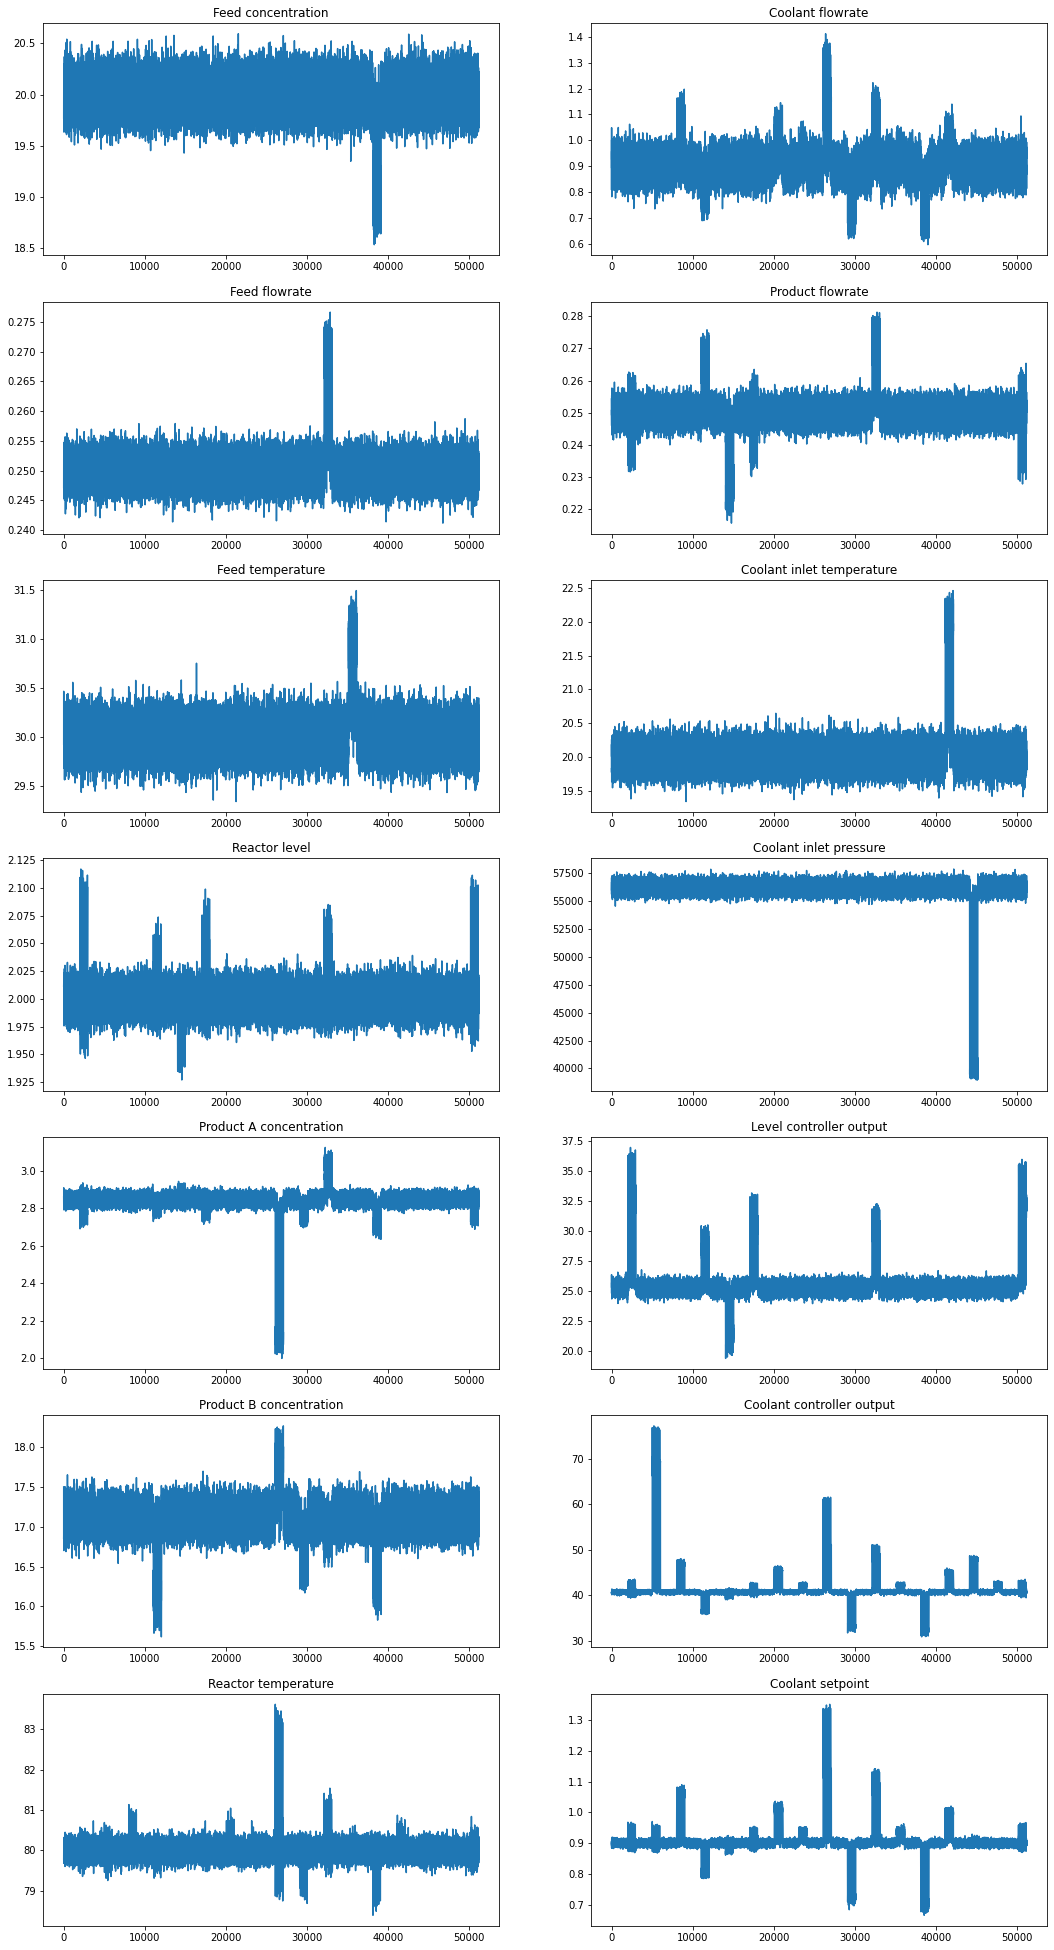

In [ ]:
#Visualizacao das features
df_aux = df_train.copy()
eixoX=list(range(len(df_aux)))
cols = list(df_aux.columns)
aux = 0
fig, axs = plt.subplots(7,2, figsize=(18, 35))
for x in range(0,2):
  for i in range(0,7):
    axs[i,x].plot(eixoX,df_aux.iloc[:,aux])
    axs[i,x].set_title(cols[aux])
    aux = aux+1

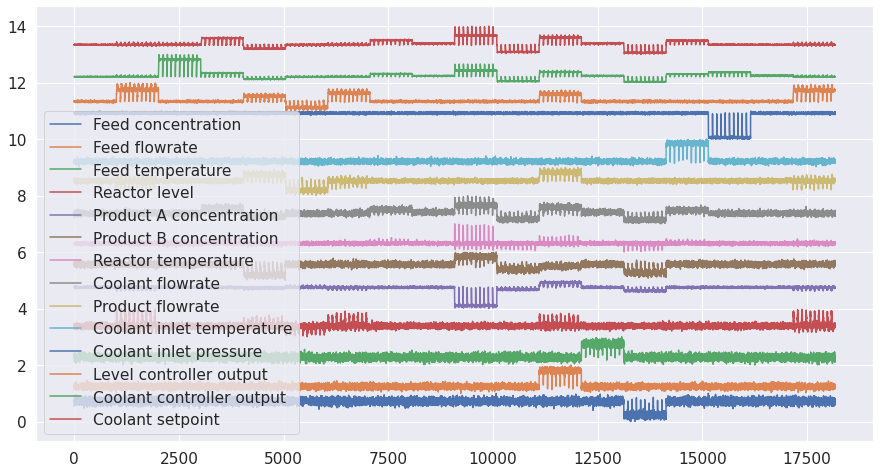

In [124]:
# Visualização normalizada
df_aux = df_train.copy()
df_aux.drop(columns=['status'],inplace=True)

tamanho = df_aux.shape

eixo_x = range(tamanho[0])
start = 0
end = 1

colunas = df_aux.columns

fig, ax = plt.subplots(figsize=(15, 8)) 
for x in range(tamanho[1]):

    arr = df_aux.iloc[:, x]
    width = end - start
    res = (arr - arr.min())/np.ptp(arr) * width + start
    
    ax.plot(eixo_x, res, label=colunas[x])

    start = start+1
    end = end+1

ax.legend(loc="lower left")  # Add a legend.
fig.show()

In [ ]:
# Grafico de correlação
df_train.corr().style.background_gradient().set_precision(2)

,Concentração de entrada,Vazão de entrada,Temperatura de entrada,Nível do Reator,Concentração de Produto A,Concentração de Produto B,Temperatura do Reator,Vazão de Refrigerante,Vazão de Produto,Temperatura Refrigerante,Pressão Refrigerante,Sinal de Controle Nível,Sinal de Controle de Vazão,Setpoint Controle Vazão,Falha
Concentração de entrada,1.00,-0.01,0.01,0.03,-0.01,0.00,-0.03,0.03,0.01,0.00,-0.02,0.00,-0.01,0.04,0.01
Vazão de entrada,-0.01,1.00,-0.03,-0.01,0.06,-0.01,-0.01,0.04,-0.04,0.02,-0.00,-0.03,-0.01,-0.01,-0.02
Temperatura de entrada,0.01,-0.03,1.00,-0.05,0.04,-0.04,0.02,0.18,0.03,0.01,-0.00,-0.08,-0.05,0.62,0.47
Nível do Reator,0.03,-0.01,-0.05,1.00,-0.44,0.06,-0.03,0.13,-0.01,0.00,-0.00,0.24,-0.01,0.25,-0.02
Concentração de Produto A,-0.01,0.06,0.04,-0.44,1.00,-0.06,-0.01,-0.13,-0.04,0.00,-0.00,-0.25,0.02,-0.24,0.04
Concentração de Produto B,0.00,-0.01,-0.04,0.06,-0.06,1.00,0.01,0.03,0.04,0.02,0.03,0.00,0.04,-0.00,-0.03
Temperatura do Reator,-0.03,-0.01,0.02,-0.03,-0.01,0.01,1.00,-0.05,-0.12,-0.05,0.01,-0.06,0.00,0.04,0.02
Vazão de Refrigerante,0.03,0.04,0.18,0.13,-0.13,0.03,-0.05,1.00,-0.02,0.00,0.00,0.07,-0.01,0.26,0.11
Vazão de Produto,0.01,-0.04,0.03,-0.01,-0.04,0.04,-0.12,-0.02,1.00,-0.01,0.01,0.18,0.02,-0.04,-0.01
Temperatura Refrigerante,0.00,0.02,0.01,0.00,0.00,0.02,-0.05,0.00,-0.01,1.00,0.01,-0.02,-0.00,0.04,0.03


Não há feature que esteja muito correlacionada com o target. "Temperatura refrigerante" e "Sinal de nivel de controle" são as que mais se destacam.

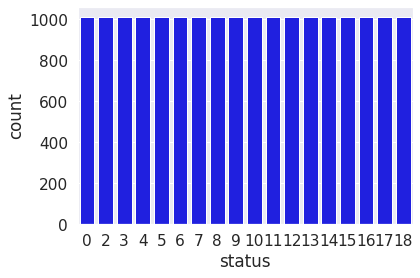

In [127]:
#Anlise da distruibuição dos rotulos 
sns.countplot(df_train['status'], color='blue');

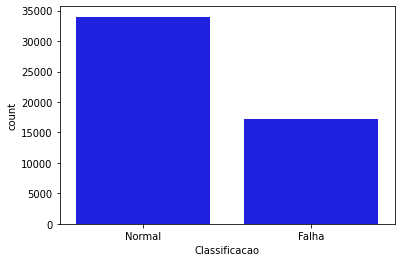

In [ ]:
df_aux = df_train.copy()
df_aux['Classificacao'] = 0
for index,row in df_aux.iterrows():
  if row['status'] != 0:
    df_aux.Classificacao.loc[index] = 'Falha'
  else:
    df_aux.Classificacao.loc[index] = 'Normal'
sns.countplot(df_aux['Classificacao'], color='blue');

## Balanceamento das classes

In [ ]:
dataset_falha_um = df_train[df_train['Falha']==1]
dataset_outras_falhas = df_train[df_train['Falha']!=1]

#Reduzindo em 30% de forma rondomica as amostras de falha 1 
df_reduzido, _ = train_test_split(dataset_falha_um,train_size=0.03, random_state=42)
df_reduzido = pd.concat([df_reduzido, dataset_outras_falhas], ignore_index=True)

#Separação da base treinameno e teste
X_train, X_test = train_test_split(df_reduzido,test_size=0.3, random_state=42)

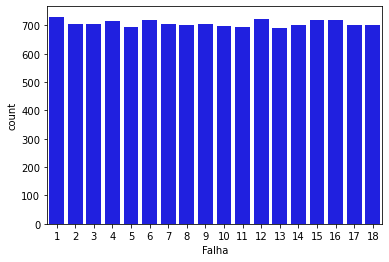

In [ ]:
#Base para treinar/validar modelo
sns.countplot(X_train['Falha'], color='blue');

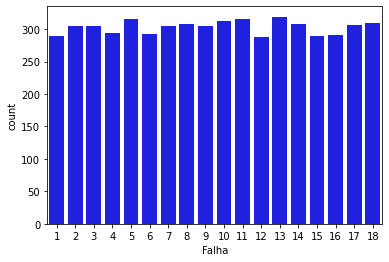

In [ ]:
#Base para testar
sns.countplot(X_test['Falha'], color='blue');

In [ ]:
#separação das features do rotulo
Y_train = X_train.Falha
X_train = X_train.drop("Falha",axis=1)
labels = sorted(list(dict.fromkeys(Y_train))) # Monta uma lista com os os rotulos, sem valores duplicados e de ordem crescente

In [ ]:
#scaling
scaler = StandardScaler()
columns = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=columns)

# Train an Test

## 1º Opção

In [128]:
scaler = StandardScaler()

Y_train = df_train.status.values
X_train = df_train.iloc[:,0:14].to_numpy()
X_train = scaler.fit_transform(X_train)

labels = sorted(list(dict.fromkeys(Y_train))) # Monta uma lista com os os rotulos, sem valores duplicados e de ordem crescente

X_train,X_valid,Y_train,Y_valid = train_test_split(X_train,Y_train,test_size=0.30,random_state=42)

In [129]:
y_valid_log = []
for val in Y_valid:
  if val != 0:
    y_valid_log.append(val-1)
  else:
    y_valid_log.append(val)

## 2º Opção

In [ ]:
#Train
Y_train = df_train.status
X_train = df_train.drop(columns =['status'], axis=1)
labels_train = sorted(list(dict.fromkeys(Y_train))) # Monta uma lista com os os rotulos, sem valores duplicados e de ordem crescente

#scaling
scaler = StandardScaler()
scaler.fit(X_train)
columns = X_train.columns
X_train = pd.DataFrame(scaler.transform(X_train),columns=columns)

In [ ]:
#Test
Y_test = df_test.status
X_test = df_test.drop(columns =['status'], axis=1)
labels_test = sorted(list(dict.fromkeys(Y_test))) # Monta uma lista com os os rotulos, sem valores duplicados e de ordem crescente

#scaling
columns = X_test.columns
X_test = pd.DataFrame(scaler.transform(X_test),columns=columns)

# Feature importance

Nessa etapa iremos reduzir a dimensionalidade do nosso dataset pela metade (apenas 7 features). Para isso iremos testar executar duas abordagens para seleção das features e avaliar qual trouxe melhor resultado.
XGBoost ou RFE. 


## XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
feature_importance = xgb.feature_importances_

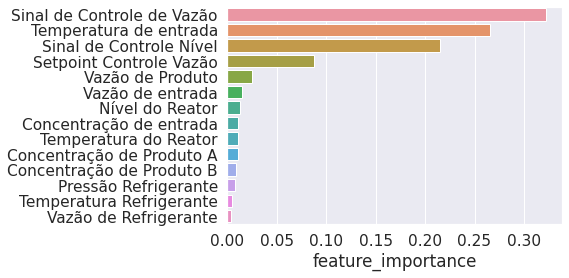

In [ ]:
df_fi_xgb = pd.DataFrame(feature_importance,index=columns,columns=["feature_importance"])
df_fi_xgb = df_fi_xgb.sort_values(by=['feature_importance'],ascending=False)
sns.barplot(x=df_fi_xgb['feature_importance'],y=df_fi_xgb.index,data=df_fi_xgb);

In [ ]:
X_train = X_train.loc[:,list(df_fi_xgb.iloc[0:4].index)]
X_test = X_test.loc[:,list(df_fi_xgb.iloc[0:4].index)]
X_train.head()

,Sinal de Controle de Vazão,Temperatura de entrada,Sinal de Controle Nível,Setpoint Controle Vazão
0,-0.338135,-0.266767,-0.236141,-0.235859
1,-0.312300,-0.895032,0.063783,-0.143308
2,-0.353227,-0.609748,-0.620277,-0.010357
3,-0.283140,0.457661,-0.188856,-0.487069
4,-0.317416,0.255718,-0.373493,-0.614143


## RFE - Recursive Feature Elimination

In [ ]:
model = LinearSVC()
rfe = RFE(model, step=1).fit(X_train, Y_train)

In [ ]:
X_train = X_train.loc[:,rfe.support_]
X_test = X_test.loc[:,rfe.support_]
X_train.head()

,Temperatura de entrada,Nível do Reator,Concentração de Produto A,Vazão de Produto,Sinal de Controle Nível,Sinal de Controle de Vazão,Setpoint Controle Vazão
0,-0.266767,0.271804,-0.864989,0.391433,-0.236141,-0.338135,-0.235859
1,-0.895032,0.591398,1.546929,-0.566950,0.063783,-0.312300,-0.143308
2,-0.609748,0.095701,-0.011105,0.915393,-0.620277,-0.353227,-0.010357
3,0.457661,1.171886,1.583351,0.822540,-0.188856,-0.283140,-0.487069
4,0.255718,-1.547928,-0.237728,-0.437618,-0.373493,-0.317416,-0.614143


# Modelos


Os algoritmos a serem implementados são:
*   Naive Bayes
*   KNN (K-Nearest Neighbors)
*   Decision Trees
*   Random Forest
*   CNN ( Neural Network)




As métricas a serem avalidas são:


*   Acurácia
*   Precisão
*   Sensitivity/recall
*   Specificity
*   F1 Score
*   ROC Análysis
*   AUC





## Funções Gerais

In [ ]:
def metrica(modelo,X_train,Y_train,labels):

  acc_mclass = pd.DataFrame()
  pre_mclass = pd.DataFrame()
  spe_mclass = pd.DataFrame()
  rec_mclass = pd.DataFrame()
  fsco_mclass = pd.DataFrame()
  auc_roc_mclass = pd.DataFrame()
  metricas = pd.DataFrame()

  # Validaçao cruzada
  # Definição de 5 splits para 30 repetições
  rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
  for linhas_treino, linhas_valid in rkf.split(X_train,Y_train):

    x_treino, x_valid = X_train[linhas_treino],X_train[linhas_valid]
    y_treino, y_valid = Y_train[linhas_treino],Y_train[linhas_valid]

    #Treinamento do modelo
    modelo.fit(x_treino,y_treino)
    y_predict = modelo.predict(x_valid)

    cm_multiclass = multilabel_confusion_matrix(y_valid,y_predict,labels=labels)

    acc_aux,pre_aux,spe_aux,rec_aux,fsco_aux,auc_roc_aux = metrics_confusion_matrix(cm_multiclass)
    
    acc_aux = pd.DataFrame(acc_aux)
    pre_aux = pd.DataFrame(pre_aux)
    spe_aux = pd.DataFrame(spe_aux)
    rec_aux = pd.DataFrame(rec_aux)
    fsco_aux = pd.DataFrame(fsco_aux)
    auc_roc_aux = pd.DataFrame(auc_roc_aux)

    # No final será gerado uma matriz com 150 registros de cada tipo de falha
    acc_mclass = pd.concat([acc_mclass,acc_aux.T],ignore_index=True)
    #print(acc_mclass)
    pre_mclass = pd.concat([pre_mclass,pre_aux.T],ignore_index=True)
    spe_mclass = pd.concat([spe_mclass,spe_aux.T],ignore_index=True)
    rec_mclass = pd.concat([rec_mclass,rec_aux.T],ignore_index=True)
    fsco_mclass = pd.concat([fsco_mclass,fsco_aux.T],ignore_index=True)

  acc_mclass = pd.DataFrame(list(acc_mclass.mean()),columns=['Acuracia'])
  metricas = pd.concat([metricas,acc_mclass],axis=1)

  pre_mclass = pd.DataFrame(list(pre_mclass.mean()),columns=['Precisão'])
  metricas = pd.concat([metricas,pre_mclass],axis=1)

  spe_mclass = pd.DataFrame(list(spe_mclass.mean()),columns=['Specificity'])
  metricas = pd.concat([metricas,spe_mclass],axis=1)

  rec_mclass = pd.DataFrame(list(rec_mclass.mean()),columns=['Recall/Sensitivity'])
  metricas = pd.concat([metricas,rec_mclass],axis=1)

  fsco_mclass = pd.DataFrame(list(fsco_mclass.mean()),columns=['F1Score'])
  metricas = pd.concat([metricas,fsco_mclass],axis=1)

  ### Setando o indice com os labels das falhas
  metricas.set_index(pd.Index(labels),inplace=True)
  return metricas

# Gera as metricas
def metrics_confusion_matrix(cm_multiclass):
   
  acc = []
  pre = [] 
  spe = []
  rec = []
  fsco = []
  auc_roc = []

  cont = 0

  for cm in cm_multiclass:
    
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    TP = cm[1,1]

    #Acuracia
    acc.append((TP+TN)/(TP+FP+FN+TN))

    #Precisão
    pre.append(TP/(TP+FP))

    #𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦
    spe.append(TN/(TN+FN))

    #recall = S𝑒𝑛𝑠𝑖𝑡𝑖𝑣𝑖𝑡𝑦
    rec.append(TP/(TP+FN))

    #F1 Score
    fsco.append(2*((rec[cont]*pre[cont])/(rec[cont]+pre[cont])))

    cont = cont+1

  return acc,pre,spe,rec,fsco,auc_roc

## Naive Bayes

In [ ]:
nb_model = GaussianNB()
metrica_nb = metrica(nb_model,X_train,Y_train,labels)
metrica_nb

,Acuracia,Precisão,Specificity,Recall/Sensitivity,F1Score
0,0.986208,0.979669,0.999914,0.999958,0.989709
2,0.979117,0.444264,0.986997,0.336722,0.382378
3,0.999414,1.000000,0.999403,0.969565,0.984469
4,0.995142,0.931080,0.996306,0.818444,0.870871
5,0.997711,0.998437,0.997698,0.886260,0.938859
6,0.996566,0.929187,0.997866,0.892989,0.910563
7,0.979675,0.497458,0.993708,0.695348,0.579579
8,0.997906,0.981573,0.998209,0.909897,0.944347
9,0.997962,0.951093,0.998946,0.949511,0.950141
10,0.999581,1.000000,0.999573,0.978793,0.989215


## KNN (K-Nearest Neighbors)

In [ ]:
knn_model = KNeighborsClassifier()
metrica_knn = metrica(knn_model,X_train,Y_train,labels)
metrica_knn

,Acuracia,Precisão,Specificity,Recall/Sensitivity,F1Score
0,0.926151,0.899862,1.000000,1.000000,0.947290
2,0.975652,0.390336,0.988027,0.408455,0.399065
3,0.998092,0.962713,0.998781,0.938824,0.950521
4,0.976572,0.413878,0.988381,0.427040,0.420094
5,0.991861,0.908397,0.993073,0.655081,0.761024
6,0.989056,1.000000,0.988962,0.438622,0.609109
7,0.979629,0.480754,0.988739,0.438114,0.458306
8,0.976870,0.417840,0.989283,0.463529,0.439332
9,0.974249,0.285780,0.983731,0.194944,0.231691
10,0.992666,0.908520,0.993977,0.699619,0.790221


## Decision Trees

In [ ]:
clf_model = DecisionTreeClassifier()
metrica_clf = metrica(clf_model,X_train,Y_train,labels)
metrica_clf

,Acuracia,Precisão,Specificity,Recall/Sensitivity,F1Score
0,0.971604,0.981545,0.952312,0.975618,0.978568
2,0.982744,0.561433,0.991405,0.573267,0.566891
3,0.999433,0.983255,0.999761,0.988119,0.985672
4,0.992222,0.785761,0.996687,0.835644,0.809386
5,0.995427,0.879979,0.997807,0.891089,0.885138
6,0.994860,0.858602,0.997726,0.887129,0.872170
7,0.993707,0.844112,0.996711,0.836634,0.840074
8,0.996932,0.924846,0.998386,0.919802,0.922058
9,0.996365,0.895647,0.998464,0.923762,0.909269
10,0.999570,0.991108,0.999741,0.987129,0.989089


## Random Forest

In [ ]:
rf_model = RandomForestClassifier(bootstrap=True,max_depth=80,max_features=1,min_samples_leaf=5,min_samples_split=12,n_estimators=200)
metrica_rf = metrica(rf_model,X_train,Y_train,labels)
metrica_rf

,Acuracia,Precisão,Specificity,Recall/Sensitivity,F1Score
0,0.985832,0.979346,0.999514,0.999765,0.989449
2,0.983330,0.581598,0.991037,0.554455,0.567478
3,0.999648,1.000000,0.999641,0.982178,0.990997
4,0.995740,0.980615,0.995988,0.800000,0.881089
5,0.997694,1.000000,0.997653,0.883168,0.937870
6,0.996228,0.926283,0.997570,0.879208,0.902042
7,0.994274,0.885121,0.996298,0.815842,0.848748
8,0.997850,0.957462,0.998645,0.932673,0.944833
9,0.997948,0.964081,0.998606,0.930693,0.947023
10,0.999746,1.000000,0.999741,0.987129,0.993516


# Validação

## Funções Gerais

In [130]:
def metricas(y_pred_prob,y_valid_log,classificador):
  y_pred = np.argmax(y_pred_prob,axis=1)
  for idx, val in enumerate(y_pred):
    if val != 0:
      y_pred[idx] = val+1

  ######## Metricas para cada rótulo #######
  cr = classification_report(Y_valid,y_pred,output_dict=True)
  df_por_rotulo = pd.DataFrame(cr).T
  df_por_rotulo.drop(df_por_rotulo.tail(3).index,inplace=True)
  df_por_rotulo.drop('support',axis=1,inplace=True)

  ######## Metricas globais do modelo conforme media de ponterada de cada rotulo ########
  acc = accuracy_score(Y_valid,y_pred)
  pre = precision_score(Y_valid,y_pred,average='weighted')
  f1_s = f1_score(Y_valid,y_pred,average='weighted')
  rec = recall_score(Y_valid,y_pred,average='weighted')
  log = log_loss(y_valid_log,y_pred_prob)
  auc = roc_auc_score(y_valid_log,y_pred_prob, multi_class='ovr',average='weighted')

  df_geral = pd.DataFrame([[acc,pre,f1_s,rec,log,auc]],columns=["Acurácia","Precisão","F1-Score","Recall","Log Loss","AUC"])

  ####### Matriz de Confusão multiclass
  cm = confusion_matrix(Y_valid,y_pred,labels)
  df_cm = pd.DataFrame(cm, index = labels,columns = labels)
  df_cm.index.name = 'Actual'
  df_cm.columns.name = 'Predicted'

  ####### Data Frame para gráfico 
  df_por_rotulo_graf = df_por_rotulo.reset_index()
  df_por_rotulo_graf['Classificador'] = classificador
  df_por_rotulo_graf.drop(columns=['recall','precision'],axis=1,inplace=True)


  for i, row in df_por_rotulo_graf.iterrows():
      falha = row['index']
      if falha != '0':
        df_por_rotulo_graf['index'].loc[i] = "Falha "+str(falha)
      else:
        df_por_rotulo_graf['index'].loc[i] = 'Op. Normal'

  df_por_rotulo_graf = df_por_rotulo_graf.append(df_por_rotulo_graf.iloc[0])

  return df_geral,df_por_rotulo,df_cm,df_por_rotulo_graf

##  Naive Bayes

In [131]:
######## Geração do Modelo ########
nb_model = GaussianNB()
nb_model.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [132]:
######## Predição do Modelo
y_pred_prob = nb_model.predict_proba(X_valid)
df_geral_nb, df_por_rotulo_nb, df_cm_nb,grafico_nb = metricas(y_pred_prob,y_valid_log,'Naive Bayes')

In [133]:
df_geral_nb

,Acurácia,Precisão,F1-Score,Recall,Log Loss,AUC
0,0.857169,0.866369,0.854651,0.857169,0.900177,0.988251


In [134]:
df_por_rotulo_nb

,precision,recall,f1-score
0,0.572854,1.000000,0.728426
2,0.488000,0.406667,0.443636
3,1.000000,0.960912,0.980066
4,0.890566,0.816609,0.851986
5,0.996350,0.850467,0.917647
6,0.904762,0.854671,0.879004
7,0.486258,0.754098,0.591260
8,0.989286,0.871069,0.926421
9,0.904321,0.948220,0.925750
10,1.000000,0.981250,0.990536


In [ ]:
plt.figure(figsize = (20,10))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm_nb, annot=True, annot_kws={"size": 16}, fmt="d",cmap="YlGnBu");

## KNN

In [135]:
######## Geração do Modelo ########
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [136]:
######## Predição ########
y_pred_prob = knn_model.predict_proba(X_valid)

df_geral_knn,df_por_rotulo_knn, df_cm_knn,grafico_knn = metricas(y_pred_prob,y_valid_log,'KNN')

In [137]:
df_geral_knn

,Acurácia,Precisão,F1-Score,Recall,Log Loss,AUC
0,0.8293,0.8502,0.836229,0.8293,1.832743,0.967422


In [63]:
df_por_rotulo_knn

,precision,recall,f1-score
0,0.926137,1.000000,0.961652
2,0.580460,0.635220,0.606607
3,1.000000,0.984424,0.992151
4,0.914729,0.802721,0.855072
5,1.000000,0.855705,0.922242
6,1.000000,0.867314,0.928943
7,0.859259,0.797251,0.827094
8,0.953737,0.861736,0.905405
9,1.000000,0.050542,0.096220
10,1.000000,0.983444,0.991653


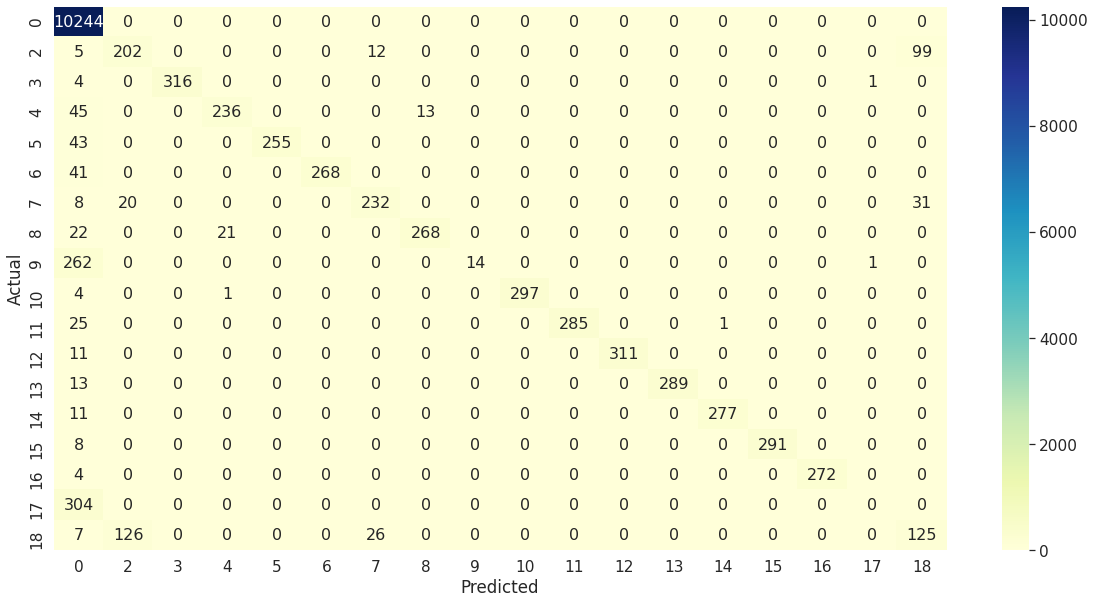

In [64]:
plt.figure(figsize = (20,10))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm_knn, annot=True, annot_kws={"size": 16}, fmt="d",cmap="YlGnBu");

## Decision Trees

In [65]:
######### 
clf_model = DecisionTreeClassifier(max_leaf_nodes=100,min_samples_split=5,max_depth=20)
clf_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
######## Prediação do modelo #########
y_pred_prob = clf_model.predict_proba(X_valid)

df_geral_dt, df_por_rotulo_dt, df_cm_dt,grafico_dt = metricas(y_pred_prob,y_valid_log,'Decision Trees')

In [67]:
df_geral_dt

,Acurácia,Precisão,F1-Score,Recall,Log Loss,AUC
0,0.964432,0.964329,0.963931,0.964432,0.238436,0.978213


In [68]:
df_por_rotulo_dt

,precision,recall,f1-score
0,0.978313,0.999610,0.988847
2,0.663082,0.581761,0.619765
3,1.000000,0.993769,0.996875
4,0.957364,0.840136,0.894928
5,0.992395,0.875839,0.930481
6,0.981752,0.870550,0.922813
7,0.857639,0.848797,0.853195
8,0.953020,0.913183,0.932677
9,0.984000,0.888087,0.933586
10,1.000000,0.986755,0.993333


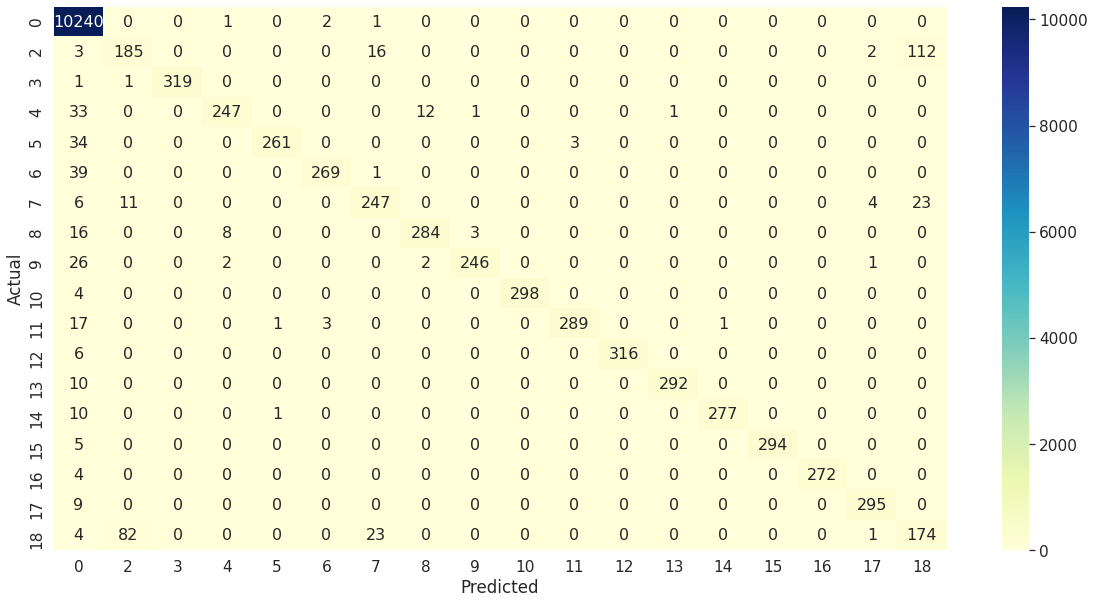

In [69]:
plt.figure(figsize = (20,10))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm_dt, annot=True, annot_kws={"size": 16}, fmt="d",cmap="YlGnBu");

## Random Forest

In [70]:
######## Geração do Modelo ########
rf_model = RandomForestClassifier(max_depth=80,min_samples_leaf=3,min_samples_split=12,n_estimators=500, random_state=42)
rf_model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [71]:
######## Predição ########
y_pred_prob = rf_model.predict_proba(X_valid)
df_geral_rf, df_por_rotulo_rf, df_cm_rf,grafico_rf = metricas(y_pred_prob,y_valid_log,'Randon Forest')

In [72]:
df_geral_rf

,Acurácia,Precisão,F1-Score,Recall,Log Loss,AUC
0,0.966517,0.966954,0.966252,0.966517,0.231218,0.983692


In [73]:
df_por_rotulo_rf

,precision,recall,f1-score
0,0.978317,0.999805,0.988944
2,0.658940,0.625786,0.641935
3,1.000000,0.996885,0.998440
4,0.983740,0.823129,0.896296
5,0.992453,0.882550,0.934281
6,1.000000,0.870550,0.930796
7,0.929889,0.865979,0.896797
8,0.953642,0.926045,0.939641
9,0.968750,0.895307,0.930582
10,1.000000,0.986755,0.993333


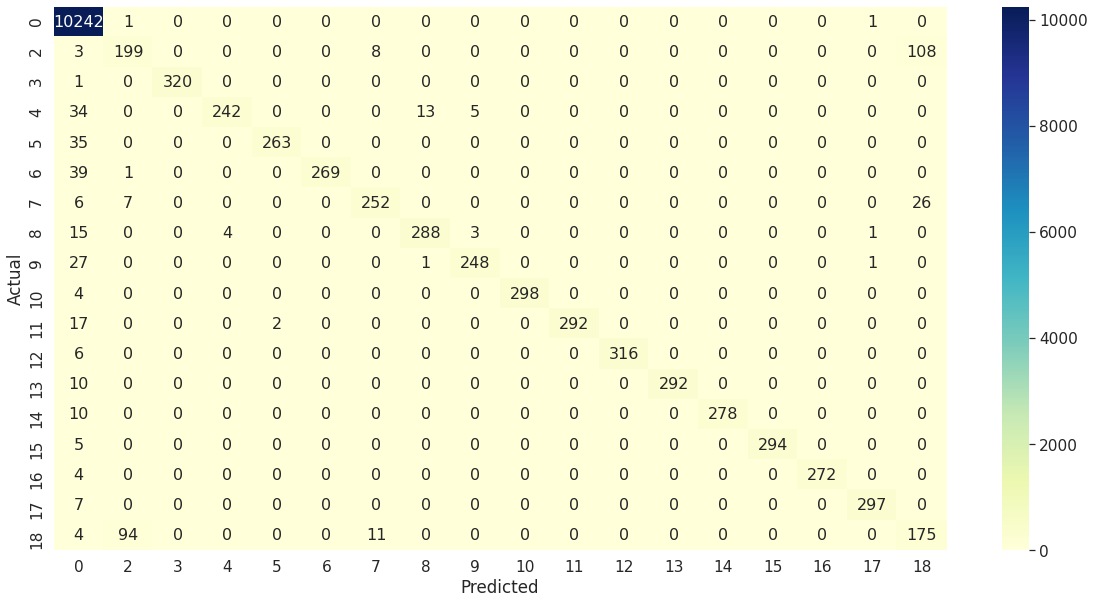

In [74]:
plt.figure(figsize = (20,10))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm_rf, annot=True, annot_kws={"size": 16}, fmt="d",cmap="YlGnBu");

## Convolution Neural Network - FCN 


### Arquitetura FCN

In [79]:
def cnn_fnc(X_train,Y_train):
  
  x_train, x_test, y_train, y_test = train_test_split(X_train,Y_train,test_size=0.15, random_state=42,shuffle=False)

  nb_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))

  # transform the labels from integers to one hot vectors
  enc = OneHotEncoder(categories='auto')
  enc.fit(np.concatenate((y_train, y_test), axis=0).reshape(-1, 1))
  y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
  y_test = enc.transform(y_test.reshape(-1, 1)).toarray()

  y_true = np.argmax(y_test, axis=1)

  x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],1))
  x_test = x_test.reshape((x_test.shape[0], x_test.shape[1],1))

  input_shape = x_train.shape[1:]

  input_layer = keras.layers.Input(input_shape)

  conv1 = keras.layers.Conv1D(filters=128, kernel_size=8, padding='same')(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.Activation(activation='relu')(conv1)

  conv2 = keras.layers.Conv1D(filters=256, kernel_size=5, padding='same')(conv1)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.Activation('relu')(conv2)

  conv3 = keras.layers.Conv1D(128, kernel_size=3,padding='same')(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.Activation('relu')(conv3)

  gap_layer = keras.layers.GlobalAveragePooling1D()(conv3)

  output_layer = keras.layers.Dense(nb_classes, activation='softmax')(gap_layer)

  model = keras.models.Model(inputs=input_layer, outputs=output_layer)

  model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(),metrics=['accuracy'])

  batch_size = 16
  nb_epochs = 20

  mini_batch_size = int(min(x_train.shape[0]/10, batch_size))

  hist = model.fit(x_train, y_train, batch_size=mini_batch_size, epochs=nb_epochs,verbose=1)

  return model,hist

### Predição

In [80]:
####### Criação do modelo ########
model, hist = cnn_fnc(X_train,Y_train)

Epoch 1/20
1903/1903 [==============================] - 40s 21ms/step - loss: 0.5196 - accuracy: 0.8762
Epoch 2/20
1903/1903 [==============================] - 39s 20ms/step - loss: 0.2017 - accuracy: 0.9444
Epoch 3/20
1903/1903 [==============================] - 39s 20ms/step - loss: 0.1806 - accuracy: 0.9500
Epoch 4/20
1903/1903 [==============================] - 38s 20ms/step - loss: 0.1689 - accuracy: 0.9525
Epoch 5/20
1903/1903 [==============================] - 38s 20ms/step - loss: 0.1659 - accuracy: 0.9531
Epoch 6/20
1903/1903 [==============================] - 38s 20ms/step - loss: 0.1478 - accuracy: 0.9570
Epoch 7/20
1903/1903 [==============================] - 38s 20ms/step - loss: 0.1476 - accuracy: 0.9592
Epoch 8/20
1903/1903 [==============================] - 39s 20ms/step - loss: 0.1549 - accuracy: 0.9573
Epoch 9/20
1903/1903 [==============================] - 38s 20ms/step - loss: 0.1350 - accuracy: 0.9618
Epoch 10/20
1903/1903 [==============================] - 38s 20m

In [82]:
######## Prediçao ########
X_valid_cnn = X_valid.reshape((X_valid.shape[0], X_valid.shape[1],1))
y_pred_prob = model.predict(X_valid_cnn)

df_geral_cnn, df_por_rotulo_cnn, df_cm_cnn,grafico_cnn = metricas(y_pred_prob,y_valid_log,'CNN')

In [ ]:
df_geral_cnn

,Acurácia,Precisão,F1-Score,Recall,Log Loss,AUC
0,0.957853,0.958448,0.95607,0.957853,0.163285,0.984439


In [83]:
df_por_rotulo_cnn

,precision,recall,f1-score
0,0.976447,0.999610,0.987893
2,0.690722,0.421384,0.523438
3,1.000000,0.990654,0.995305
4,0.969466,0.863946,0.913669
5,1.000000,0.865772,0.928058
6,1.000000,0.883495,0.938144
7,0.813456,0.914089,0.860841
8,0.979381,0.916399,0.946844
9,0.983936,0.884477,0.931559
10,1.000000,0.983444,0.991653


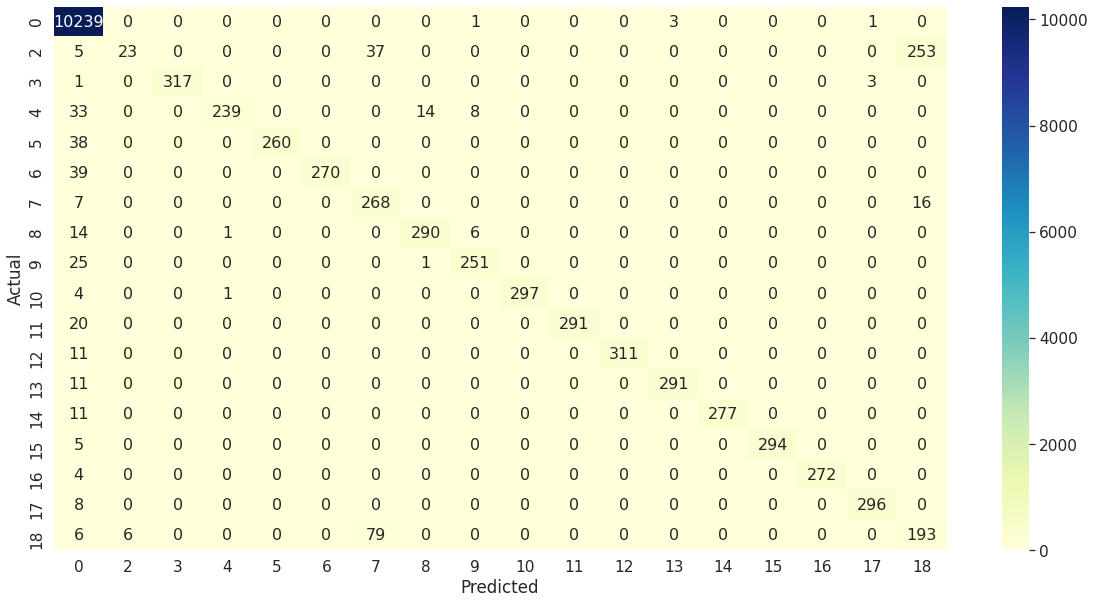

In [ ]:
plt.figure(figsize = (20,10))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm_cnn, annot=True, annot_kws={"size": 16}, fmt="d",cmap="YlGnBu");

# Comparação entre modelos

In [114]:
new_index = ['Naive Bayes','KNN','Decision Trees','Randon Forest',"CNN"]

## Métricas Gerais

In [85]:
df_geral = pd.concat([df_geral_nb,df_geral_knn,df_geral_dt,df_geral_rf,df_geral_cnn], ignore_index=True)
df_geral.index = new_index
df_geral

,Acurácia,Precisão,F1-Score,Recall,Log Loss,AUC
Naive Bayes,0.947886,0.946147,0.946100,0.947886,0.391589,0.983604
KNN,0.923849,0.907478,0.906518,0.923849,1.359763,0.945349
Decision Trees,0.964432,0.964329,0.963931,0.964432,0.238436,0.978213
Randon Forest,0.966517,0.966954,0.966252,0.966517,0.231218,0.983692
CNN,0.962478,0.963078,0.961488,0.962478,0.172824,0.984123


##Métricas por rótulo

In [86]:
df_por_rotulo_nb = df_por_rotulo_nb.T
df_por_rotulo_knn = df_por_rotulo_knn.T
df_por_rotulo_dt = df_por_rotulo_dt.T
df_por_rotulo_rf = df_por_rotulo_rf.T
df_por_rotulo_cnn = df_por_rotulo_cnn.T
df_por_rotulo = pd.concat([df_por_rotulo_nb,df_por_rotulo_knn,df_por_rotulo_dt,df_por_rotulo_rf,df_por_rotulo_cnn], keys=new_index)
df_por_rotulo.columns.name = 'Status'
df_por_rotulo

Status                           0         2  ...        17        18
Naive Bayes    precision  0.976735  0.440816  ...  1.000000  0.334884
               recall     1.000000  0.339623  ...  0.973684  0.253521
               f1-score   0.988231  0.383659  ...  0.986667  0.288577
KNN            precision  0.926137  0.580460  ...  0.000000  0.490196
               recall     1.000000  0.635220  ...  0.000000  0.440141
               f1-score   0.961652  0.606607  ...  0.000000  0.463822
Decision Trees precision  0.978313  0.663082  ...  0.973597  0.563107
               recall     0.999610  0.581761  ...  0.970395  0.612676
               f1-score   0.988847  0.619765  ...  0.971993  0.586847
Randon Forest  precision  0.978317  0.658940  ...  0.990000  0.566343
               recall     0.999805  0.625786  ...  0.976974  0.616197
               f1-score   0.988944  0.641935  ...  0.983444  0.590219
CNN            precision  0.976447  0.690722  ...  0.989933  0.490196
               recall     0.999610  0.421384  ...  0.970395  0.616197
               f1-score   0.987893  0.523438  ...  0.980066  0.546022

[15 rows x 18 columns]

In [87]:
df_grafico = pd.concat([grafico_nb,grafico_knn,grafico_dt,grafico_rf,grafico_cnn])

In [113]:
classificadores = new_index

classificador_color = {
    'CNN': '#002366', 
    'Randon Forest': '#ED2124', 
} 
figure = go.Figure()

for one_clas in classificadores:
    color = classificador_color.get(one_clas, 'lightslategrey')
    highlight = color != 'lightslategrey' 
    data_filtered = df_grafico[df_grafico['Classificador'] == one_clas]
    axis = data_filtered['index'].tolist()
    plot_data = np.array(data_filtered['f1-score'].tolist())*100
    figure.add_trace(
        go.Scatterpolar(
            r=plot_data, 
            theta=axis,
            #showlegend=highlight, 
            name=one_clas, 
            hoverinfo='name+r',
            hovertemplate='%{r:00.00f}%',
            mode='lines',
            line_color=color,
            opacity=0.8 if highlight else 0.25,
            line_shape='spline',
            line_smoothing=0.8,
            line_width=1.6 if highlight else 0.6 
        )
    )
    
title = 'Comparação da F1-Score para os classificadores CNN e Random Forest' \
        '<br><span style="font-size:10px"><i>A superioridade do Random Forest é evidenciada nas falhas 2 e 18</span></i>'

figure.update_layout(
    title_text = title,
    title_font_color = '#333333',
    title_font_size = 14,    
    polar_bgcolor='white',
    polar_radialaxis_visible=True,
    polar_radialaxis_showticklabels=True,
    polar_radialaxis_tickfont_color='darkgrey',
    polar_angularaxis_color='grey',
    polar_angularaxis_showline=False,
    polar_radialaxis_showline=False,
    polar_radialaxis_layer='below traces',
    polar_radialaxis_gridcolor='#F2F2F2',
    polar_radialaxis_range=(0,100),
    polar_radialaxis_tickvals=[25, 50, 75],
    polar_radialaxis_ticktext=['25%', '50%','75%'],
    polar_radialaxis_tickmode='array',
    polar_angularaxis_rotation = 90,
    
    legend_font_color = 'grey', # We don't want to draw attention to the legend 
    legend_itemclick = 'toggleothers', # Change the default behaviour, when click select only that trace
    legend_itemdoubleclick = 'toggle', # Change the default behaviour, when double click ommit that trace
    width = 800, # chart size 
    height = 500 # chart size
)

figure.show()